데이터 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType

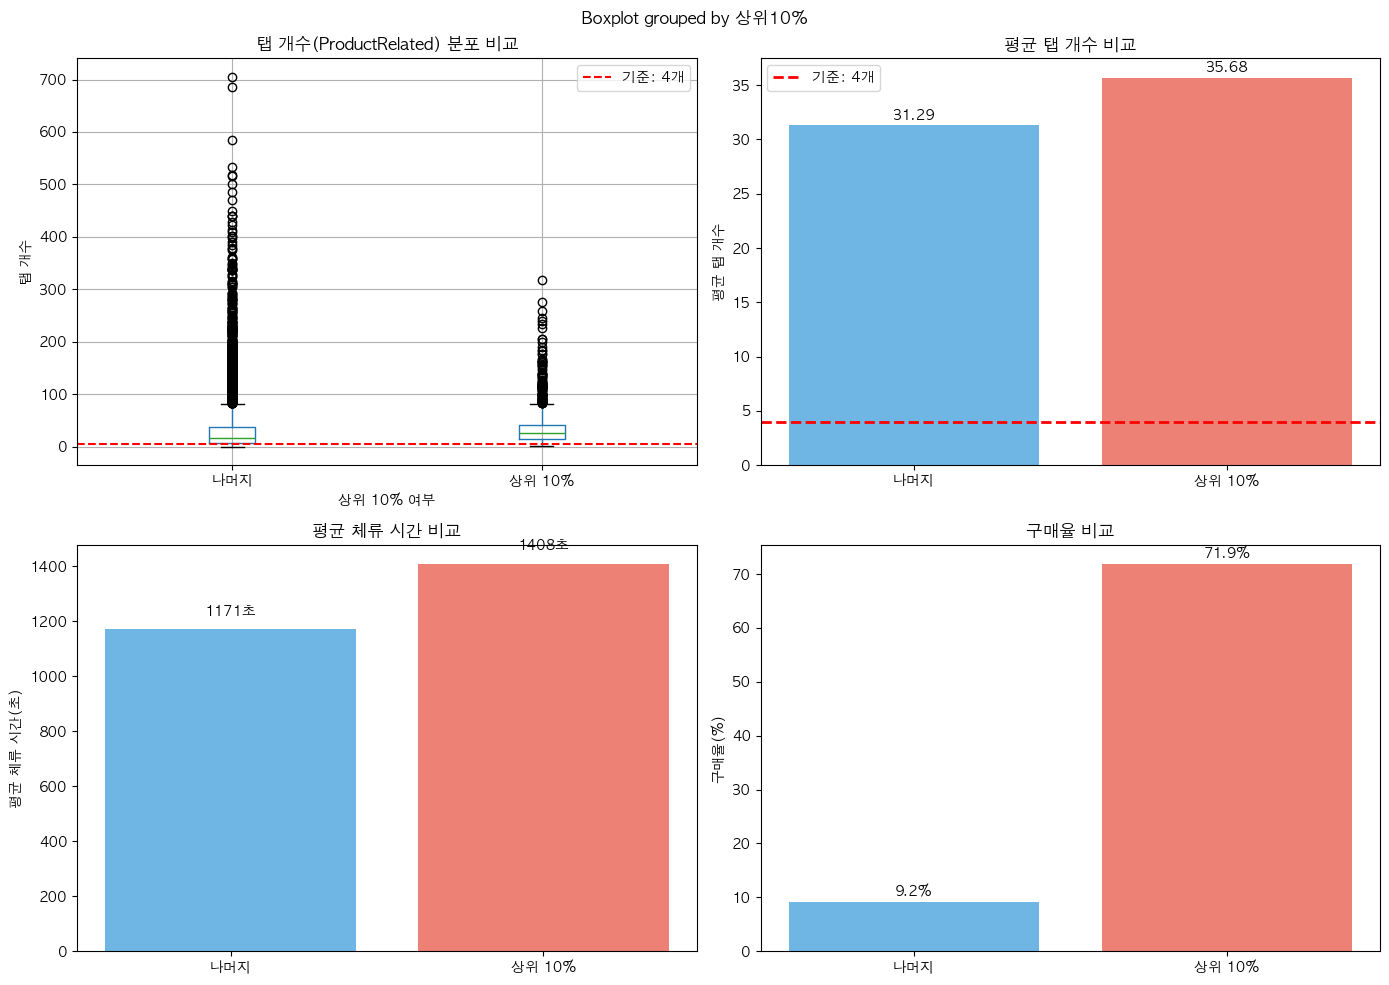



📊 분석 결론 요약
1. 상위 10% 고객의 평균 탭 개수: 35.68개
   → 가설 기준(4개) 충족

2. 탭 개수 차이: 4.39개 더 많음
   → 통계적 유의성: 있음 (p<0.05)

3. 상위 10% 고객은 1.20배 더 오래 머뭄

4. 상위 10% 고객의 구매율은 7.80배 더 높음


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (그래프에서 한글이 깨지지 않도록)
plt.rcParams['font.family'] = 'appleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# ========================================
# 1. 데이터 불러오기
# ========================================
# CSV 파일 경로를 지정하세요
df = pd.read_csv('/Users/h/Desktop/ms/vscode/my/dataton_project/data/online_shoppers/online_shoppers_intention.csv')

print("데이터 기본 정보:")
print(df.info())
print("\n처음 5개 행:")
print(df.head())

# ========================================
# 2. PageValues 상위 10% 고객 구분하기
# ========================================
# PageValues의 90% 지점 값을 구함 (상위 10%의 기준점)
threshold_90 = df['PageValues'].quantile(0.90)
print(f"\n\nPageValues 상위 10% 기준값: {threshold_90:.2f}")

# 상위 10% 고객 여부를 표시하는 새 컬럼 생성
df['상위10%'] = df['PageValues'] >= threshold_90

# 상위 10%와 나머지 고객 수 확인
print(f"상위 10% 고객 수: {df['상위10%'].sum()}명")
print(f"나머지 고객 수: {(~df['상위10%']).sum()}명")

# ========================================
# 3. 가설 검정: 평균 탭 개수 비교
# ========================================
# 가설: 상위 10% 고객은 평균 4개 이상의 탭(ProductRelated)을 연다

# 상위 10% 고객의 평균 ProductRelated 값
avg_top10 = df[df['상위10%']]['ProductRelated'].mean()

# 나머지 고객의 평균 ProductRelated 값
avg_others = df[~df['상위10%']]['ProductRelated'].mean()

print(f"\n\n=== 가설 검정 결과 ===")
print(f"상위 10% 고객의 평균 탭 개수: {avg_top10:.2f}개")
print(f"나머지 고객의 평균 탭 개수: {avg_others:.2f}개")
print(f"차이: {avg_top10 - avg_others:.2f}개")

# 가설이 맞는지 확인
if avg_top10 >= 4:
    print(f"\n✓ 가설 충족: 상위 10% 고객은 평균 {avg_top10:.2f}개로 4개 이상입니다!")
else:
    print(f"\n✗ 가설 불충족: 상위 10% 고객은 평균 {avg_top10:.2f}개로 4개 미만입니다.")

# ========================================
# 4. 통계적 유의성 검정 (t-검정)
# ========================================
# 상위 10%와 나머지 고객의 탭 개수 차이가 통계적으로 유의한지 확인
from scipy import stats

# 두 그룹의 데이터
top10_tabs = df[df['상위10%']]['ProductRelated']
others_tabs = df[~df['상위10%']]['ProductRelated']

# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(top10_tabs, others_tabs)

print(f"\n\n=== 통계적 유의성 검정 ===")
print(f"t-통계량: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

if p_value < 0.05:
    print("→ 통계적으로 유의한 차이가 있습니다! (p < 0.05)")
else:
    print("→ 통계적으로 유의한 차이가 없습니다. (p ≥ 0.05)")

# ========================================
# 5. 추가 분석: 체류 시간과 구매율
# ========================================
print(f"\n\n=== 추가 분석 ===")

# 평균 체류 시간 비교
avg_duration_top10 = df[df['상위10%']]['ProductRelated_Duration'].mean()
avg_duration_others = df[~df['상위10%']]['ProductRelated_Duration'].mean()

print(f"상위 10% 평균 체류 시간: {avg_duration_top10:.2f}초")
print(f"나머지 평균 체류 시간: {avg_duration_others:.2f}초")

# 구매율 비교 (Revenue가 True인 비율)
purchase_rate_top10 = df[df['상위10%']]['Revenue'].mean() * 100
purchase_rate_others = df[~df['상위10%']]['Revenue'].mean() * 100

print(f"\n상위 10% 구매율: {purchase_rate_top10:.2f}%")
print(f"나머지 구매율: {purchase_rate_others:.2f}%")

# ========================================
# 6. 시각화
# ========================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 6-1. 탭 개수 분포 비교 (박스플롯)
ax1 = axes[0, 0]
df.boxplot(column='ProductRelated', by='상위10%', ax=ax1)
ax1.set_title('탭 개수(ProductRelated) 분포 비교')
ax1.set_xlabel('상위 10% 여부')
ax1.set_ylabel('탭 개수')
ax1.axhline(y=4, color='r', linestyle='--', label='기준: 4개')
ax1.legend()
plt.sca(ax1)
plt.xticks([1, 2], ['나머지', '상위 10%'])

# 6-2. 평균 탭 개수 막대그래프
ax2 = axes[0, 1]
groups = ['나머지', '상위 10%']
means = [avg_others, avg_top10]
colors = ['#3498db', '#e74c3c']
ax2.bar(groups, means, color=colors, alpha=0.7)
ax2.axhline(y=4, color='red', linestyle='--', linewidth=2, label='기준: 4개')
ax2.set_ylabel('평균 탭 개수')
ax2.set_title('평균 탭 개수 비교')
ax2.legend()
for i, v in enumerate(means):
    ax2.text(i, v + 0.5, f'{v:.2f}', ha='center', fontweight='bold')

# 6-3. 체류 시간 비교
ax3 = axes[1, 0]
duration_means = [avg_duration_others, avg_duration_top10]
ax3.bar(groups, duration_means, color=colors, alpha=0.7)
ax3.set_ylabel('평균 체류 시간(초)')
ax3.set_title('평균 체류 시간 비교')
for i, v in enumerate(duration_means):
    ax3.text(i, v + 50, f'{v:.0f}초', ha='center', fontweight='bold')

# 6-4. 구매율 비교
ax4 = axes[1, 1]
purchase_rates = [purchase_rate_others, purchase_rate_top10]
ax4.bar(groups, purchase_rates, color=colors, alpha=0.7)
ax4.set_ylabel('구매율(%)')
ax4.set_title('구매율 비교')
for i, v in enumerate(purchase_rates):
    ax4.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
# plt.savefig('pagevalues_hypothesis_test.png', dpi=300, bbox_inches='tight')
# print("\n\n그래프가 'pagevalues_hypothesis_test.png'로 저장되었습니다.")
plt.show()

# ========================================
# 7. 결론 요약
# ========================================
print("\n\n" + "="*50)
print("📊 분석 결론 요약")
print("="*50)
print(f"1. 상위 10% 고객의 평균 탭 개수: {avg_top10:.2f}개")
print(f"   → 가설 기준(4개) {'충족' if avg_top10 >= 4 else '미충족'}")
print(f"\n2. 탭 개수 차이: {avg_top10 - avg_others:.2f}개 더 많음")
print(f"   → 통계적 유의성: {'있음 (p<0.05)' if p_value < 0.05 else '없음 (p≥0.05)'}")
print(f"\n3. 상위 10% 고객은 {avg_duration_top10/avg_duration_others:.2f}배 더 오래 머뭄")
print(f"\n4. 상위 10% 고객의 구매율은 {purchase_rate_top10/purchase_rate_others:.2f}배 더 높음")
print("="*50)